# Case Study: Image Noise Reduction Using Auto-Encoders

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/noise.png?raw=true" width="500" Height="250"/>

# Introduction

Auto-Encoders are well known in dimensionality reduction and information retrieval. These are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data

In this project, the objective is to reduce the noise in the images. Basically, it will take the noisy images as input and tries to reconstruct the images without noise. The plan will be load the data, apply noise factor into them and then apply the Auto-Encoder.

# Review

<img src="https://miro.medium.com/max/5656/1*has2O8b3HAUqvcqqLrlBQA.png" width="500" Height="250"/>

Differently from sparse autoencoders or undercomplete autoencoders that constrain representation, Denoising autoencoders (DAE) try to achieve a good representation by changing the reconstruction criterion.

Indeed, DAEs take a partially corrupted input and are trained to recover the original undistorted input. In practice, the objective of denoising autoencoders is that of cleaning the corrupted input, or denoising. Two underlying assumptions are inherent to this approach:

Higher level representations are relatively stable and robust to the corruption of the input;
To perform denoising well, the model needs to extract features that capture useful structure in the distribution of the input.

In other words, denoising is advocated as a training criterion for learning to extract useful features that will constitute better higher level representations of the input.

**Source:** Wikipedia

# Libraries And Data Importation

In [24]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [25]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

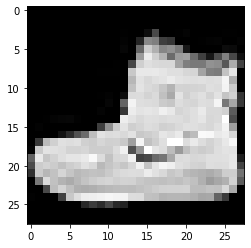

In [26]:
# Check sample image
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [27]:
# Check shape of the training data
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [28]:
# Check shape of the testing data
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Data Visualization

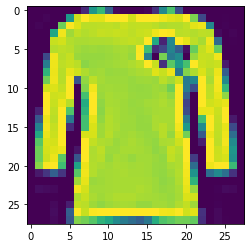

In [29]:
# Generate random number
i = random.randint(1,60000)

# Show random image
plt.imshow(X_train[i])
plt.show()

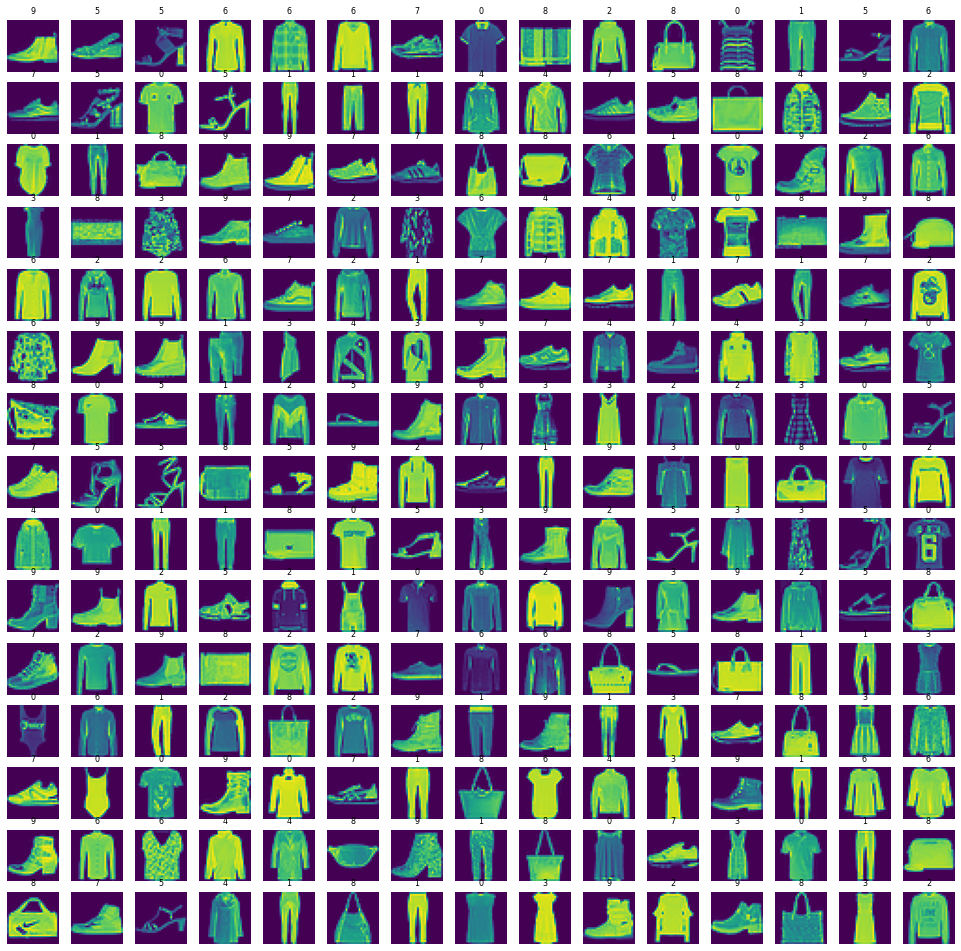

In [30]:
# Define the dimension of the plot grid
W_grid = 15
L_grid = 15

# Create subplots
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# Flaten the 15x15 matrix into 225 array
axes = axes.ravel()

# Get the length of the training dataset
n_training = len(X_train)

# Select a number from 0 to the number of training dataset
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

# Data Preprocessing And Apply Noise Filter

In [31]:
# Normalize the data
X_train = X_train/255
X_test = X_test/255

In [32]:
# Noise factor magnitude
noise_factor = 0.3

# Create empty label for training data
noise_dataset = []

# Add some noise
for img in X_train:
    noisy_image  = img + noise_factor * np.random.randn(*img.shape)
    # Clip the image from range 0 to 1
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

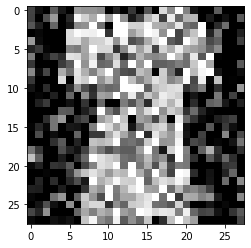

In [33]:
# Show image
plt.imshow(noise_dataset[10], cmap = 'gray')
plt.show()

In [34]:
# Convert into array form
noise_dataset = np.array(noise_dataset)

In [35]:
# Noise factor magnitude
noise_factor = 0.1

# Create empty label for testing data
noise_test_dataset = []

# Add some noise
for img in X_test:
    noisy_image  = img + noise_factor * np.random.randn(*img.shape)
    # Clip the image from range 0 to 1
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

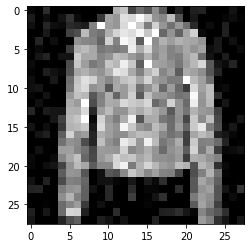

In [36]:
# Show image
plt.imshow(noise_test_dataset[10], cmap = 'gray')
plt.show()

In [37]:
# Convert into array form
noise_test_dataset = np.array(noise_test_dataset)

# Model Building And Training

In [38]:
# Build And Train Model
autoencoder = tf.keras.models.Sequential()

# first Encoder layer
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))

# Second Encoder layer
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

# Third Encoder layer
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

# First Decode layer
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))

# Second Decode layer
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [39]:
# Compile model
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))

# Check summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Check train dataset dimension
noise_dataset.reshape(-1, 28, 28, 1).shape, X_train.reshape(-1, 28, 28, 1).shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [41]:
# Check test dataset dimension
noise_test_dataset.reshape(-1, 28, 28, 1).shape, X_test.reshape(-1, 28, 28, 1).shape

((10000, 28, 28, 1), (10000, 28, 28, 1))

In [42]:
# Fit the model
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs = 10, batch_size = 200, validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 39s 130ms/step - loss: 0.4040 - val_loss: 0.3123
Epoch 2/10
300/300 [==============================] - 22s 73ms/step - loss: 0.3133 - val_loss: 0.3007
Epoch 3/10
300/300 [==============================] - 27s 91ms/step - loss: 0.3074 - val_loss: 0.2956
Epoch 4/10
300/300 [==============================] - 26s 88ms/step - loss: 0.3045 - val_loss: 0.2927
Epoch 5/10
300/300 [==============================] - 26s 88ms/step - loss: 0.3031 - val_loss: 0.2922
Epoch 6/10
300/300 [==============================] - 27s 90ms/step - loss: 0.3023 - val_loss: 0.2918
Epoch 7/10
300/300 [==============================] - 28s 94ms/step - loss: 0.3018 - val_loss: 0.2894
Epoch 8/10
300/300 [==============================] - 28s 93ms/step - loss: 0.3014 - val_loss: 0.2906
Epoch 9/10
300/300 [==============================] - 29s 98ms/step - loss: 0.3011 - val_loss: 0.2897
Epoch 10/10
300/300 [==============================] - 34s 112ms/step - loss: 0.3

# Model Evaluation

In [43]:
# Evaualate model
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))

# Check test accuracy
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 7ms/step - loss: 0.2889
Test Accuracy : 0.289


In [44]:
# Store prediction
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

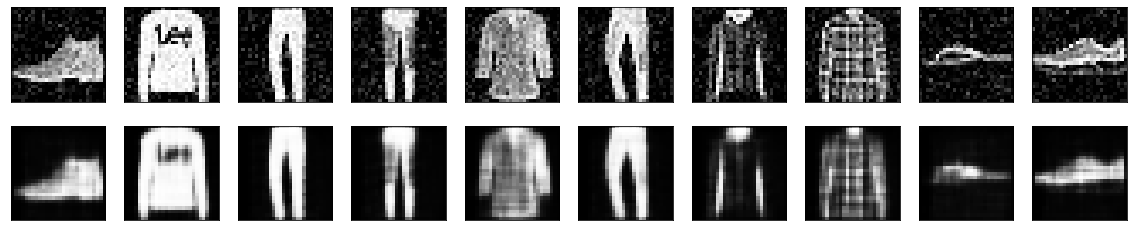

In [45]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20, 4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Conlusion

The first row is the original image and the second row is the auto-encoder's prediction. The auto-encoder was able to remove the noise in the image but it can also be observed that the image's resolution became a little bit distorted. It is because of the encoding phase. It is like compressing the image and then reconstructing it again.This can be further improve by changing the model architecture and tuning some parameters.